In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statistics
from datetime import datetime
data = pd.read_csv('bus.csv')

In [3]:
def format_time(time):
    return datetime.fromisoformat(time[:-1])

In [4]:
def subtract_time(observed, scheduled):
    return (observed - scheduled).total_seconds() / 60

In [95]:
#missing data
missing = data.id.count() - data.observed_visit_time.count() 

#dropping rows where observed_visit_time data is missing
observed_times = data.dropna(subset = ["observed_visit_time", "scheduled_visit_time"]) 
observed_times_copy = observed_times.copy()
observed_times_copy['observed_visit_time'] = observed_times_copy['observed_visit_time'].map(format_time)
observed_times_copy['scheduled_visit_time'] = observed_times_copy['scheduled_visit_time'].map(format_time)

observed_times_formatted = observed_times_copy['observed_visit_time']
observed_times_formatted = observed_times_formatted.reset_index(drop=True)
#print(observed_times_formatted)

scheduled_times_formatted = observed_times_copy['scheduled_visit_time']
scheduled_times_formatted = scheduled_times_formatted.reset_index(drop=True)
#print(scheduled_times_formatted )

difference_times_total = np.empty(0)
difference_times_weekday = np.empty(0)
difference_times_weekend = np.empty(0)
rush_hours = np.empty(0)
normal_hours = np.empty(0)
threshold = 10
hour_counts = {}

for number in range(0, observed_times_formatted.shape[0] - 1):
    time_difference = subtract_time(observed_times_formatted[number], scheduled_times_formatted[number])
    if (scheduled_times_formatted[number].weekday() == 5 or scheduled_times_formatted[number].weekday() == 6):
        difference_times_weekend = np.append(difference_times_weekend, time_difference)
    else: 
        difference_times_weekday = np.append(difference_times_weekday, time_difference)
    difference_times_total = np.append(difference_times_total, time_difference)
    
    formatted_time = scheduled_times_formatted[number]
    just_time = formatted_time.time()
    hour = just_time.hour
    hour_counts[hour] = hour_counts.get(hour, 0) + 1
    if(abs(time_difference) > threshold):
        rush_hours = np.append(rush_hours, hour)
    else:
        normal_hours = np.append(normal_hours, hour)

hour_count = np.empty(0)
for number in range(0, 24):
    hour_count = np.append(hour_count, hour_counts[number])



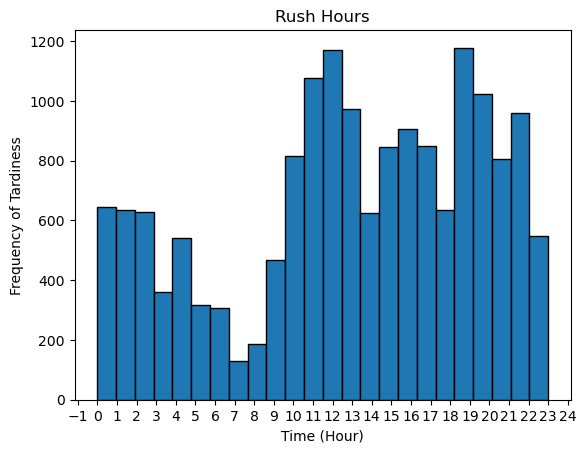

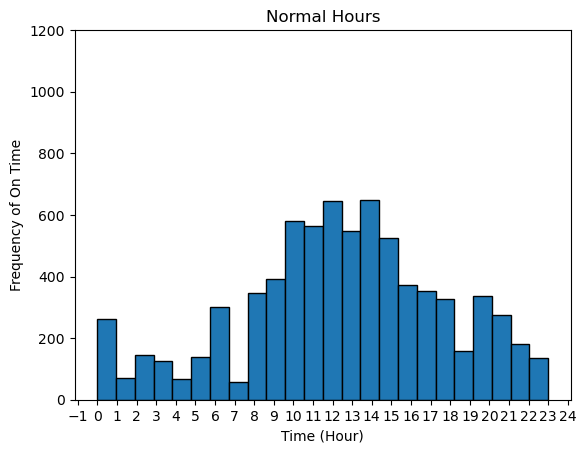

In [78]:
# Create a histogram plot
plt.hist(rush_hours, bins=24, edgecolor='black')

# Set plot title and labels
plt.title('Rush Hours')
plt.xlabel('Time (Hour)')
plt.ylabel('Frequency of Tardiness')

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

# Display the plot
plt.show()


plt.hist(normal_hours, bins=24, edgecolor='black')
plt.title('Normal Hours')
plt.xlabel('Time (Hour)')
plt.ylabel('Frequency of On Time')
plt.ylim(0, 1200)  # Set y-axis limits from 0 to 1200
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()


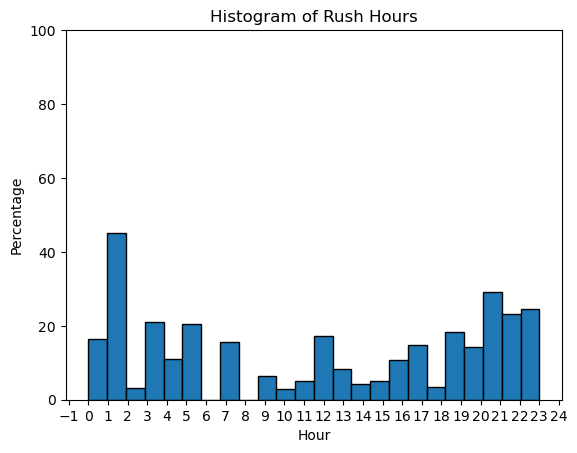

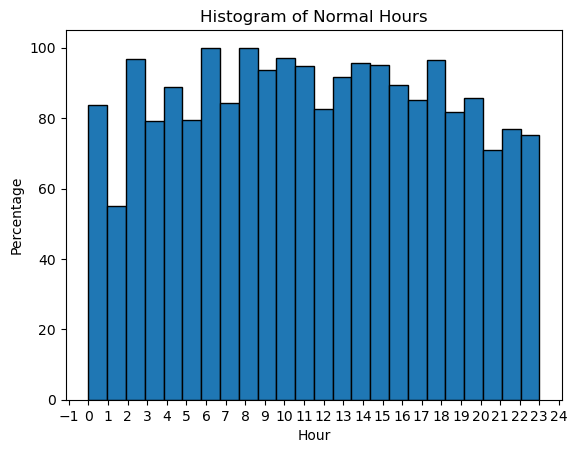

In [108]:
plt.hist(rush_hours, bins=24)

# Calculate the histogram counts and bin edges
counts, bin_edges, _ = plt.hist(rush_hours, bins=24)

# Calculate the percentages
percentages = (counts / hour_count) * 100

# Plotting with percentages on the y-axis
plt.clf()  # Clear the previous plot
plt.bar(bin_edges[:-1], percentages, align='edge', width=np.diff(bin_edges), edgecolor = 'black')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Percentage')
plt.title('Histogram of Rush Hours')
plt.ylim(0, 100)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

# Display the plot
plt.show()

##############################################################################################################

plt.hist(normal_hours, bins=24)

# Calculate the histogram counts and bin edges
counts, bin_edges, _ = plt.hist(normal_hours, bins=24)

# Calculate the percentages
percentages = (counts / hour_count) * 100

# Plotting with percentages on the y-axis
plt.clf()  # Clear the previous plot
plt.bar(bin_edges[:-1], percentages, align='edge', width=np.diff(bin_edges), edgecolor = 'black')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Percentage')
plt.title('Histogram of Normal Hours')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))


# Display the plot
plt.show()

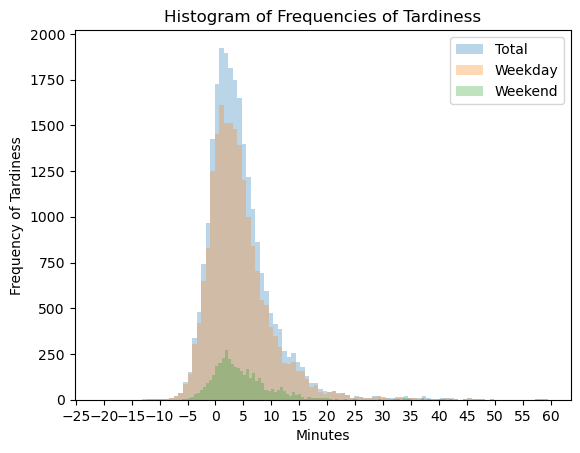

In [112]:
# Create a histogram plot
plt.hist(difference_times_total, bins=100, alpha = 0.3, label='Total')
plt.hist(difference_times_weekday, bins=100, alpha = 0.3, label='Weekday')
plt.hist(difference_times_weekend, bins=100, alpha = 0.3, label='Weekend')

# Set plot title and labels
plt.title('Histogram of Frequencies of Tardiness')
plt.xlabel('Minutes')
plt.ylabel('Frequency of Tardiness')
plt.legend()


plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

# Display the plot
plt.show()




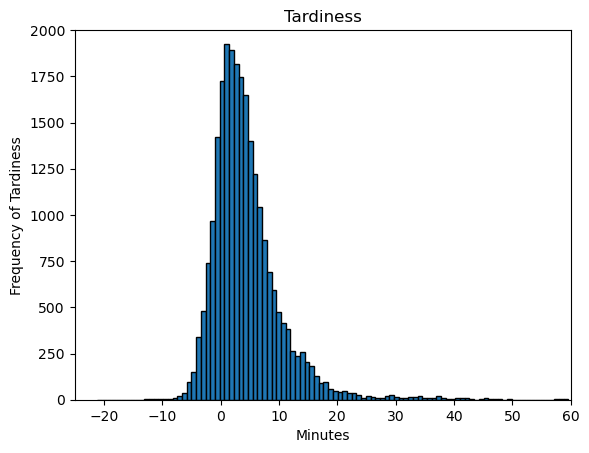

4.3801552375437725
0.6577666666666667
6.651983333333334
6.013859995057068


In [69]:
# Create a histogram plot
plt.hist(difference_times_total, bins=100, edgecolor='black')

# Set plot title and labels
plt.title('Tardiness')
plt.xlabel('Minutes')
plt.ylabel('Frequency of Tardiness')
plt.xlim(-25, 60)  # Set x-axis limits from -25 to 60
plt.ylim(0, 2000)  # Set y-axis limits from 0 to 2000

# Display the plot
plt.show()

print(difference_times_total.mean())
print(np.quantile(difference_times_total, 0.25))
print(np.quantile(difference_times_total, 0.75))
print(np.std(difference_times_total))

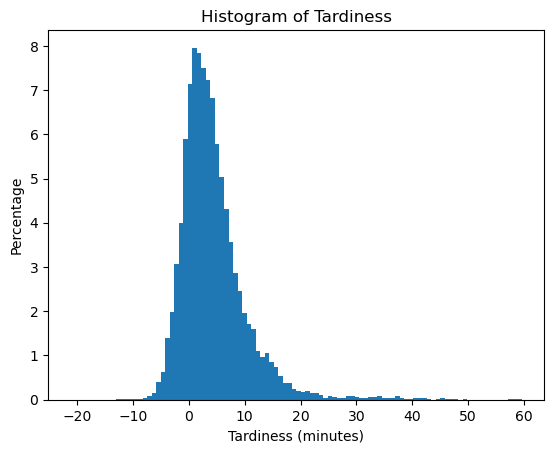

In [74]:
plt.hist(difference_times_total, bins=100)

# Calculate the histogram counts and bin edges
counts, bin_edges, _ = plt.hist(difference_times_total, bins=100)

# Calculate the percentages
percentages = (counts / len(difference_times_total)) * 100

# Plotting with percentages on the y-axis
plt.clf()  # Clear the previous plot
plt.bar(bin_edges[:-1], percentages, align='edge', width=np.diff(bin_edges), )

# Add labels and title
plt.xlabel('Tardiness (minutes)')
plt.ylabel('Percentage')
plt.title('Histogram of Tardiness')

# Display the plot
plt.show()






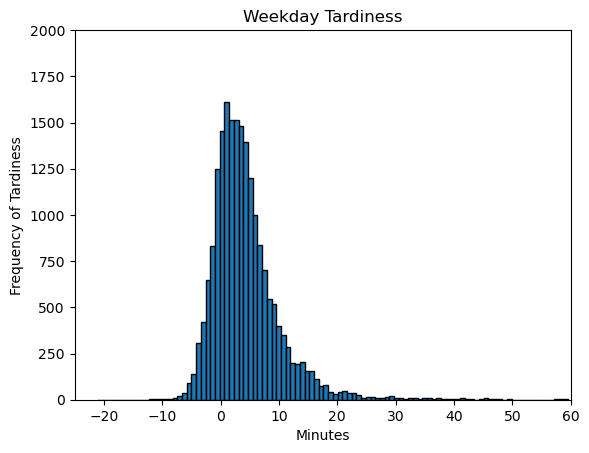

4.276248215403367
0.5681916666666667
6.5301125


In [66]:
# Create a histogram plot
plt.hist(difference_times_weekday, bins=100, edgecolor='black')

# Set plot title and labels
plt.title('Weekday Tardiness')
plt.xlabel('Minutes')
plt.ylabel('Frequency of Tardiness')
plt.xlim(-25, 60)  # Set x-axis limits from -25 to 60
plt.ylim(0, 2000)  # Set y-axis limits from 0 to 2000

# Display the plot
plt.show()

print(difference_times_weekday.mean())
print(np.quantile(difference_times_weekday, 0.25))
print(np.quantile(difference_times_weekday, 0.75))

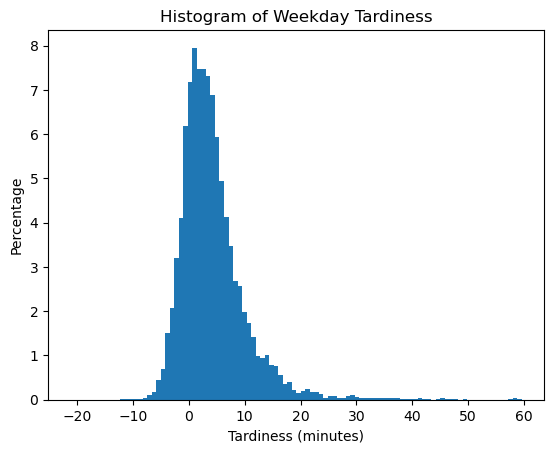

In [110]:
plt.hist(difference_times_weekday, bins=100)

# Calculate the histogram counts and bin edges
counts, bin_edges, _ = plt.hist(difference_times_weekday, bins=100)

# Calculate the percentages
percentages = (counts / len(difference_times_weekday)) * 100

# Plotting with percentages on the y-axis
plt.clf()  # Clear the previous plot
plt.bar(bin_edges[:-1], percentages, align='edge', width=np.diff(bin_edges))

# Add labels and title
plt.xlabel('Tardiness (minutes)')
plt.ylabel('Percentage')
plt.title('Histogram of Weekday Tardiness')

# Display the plot
plt.show()

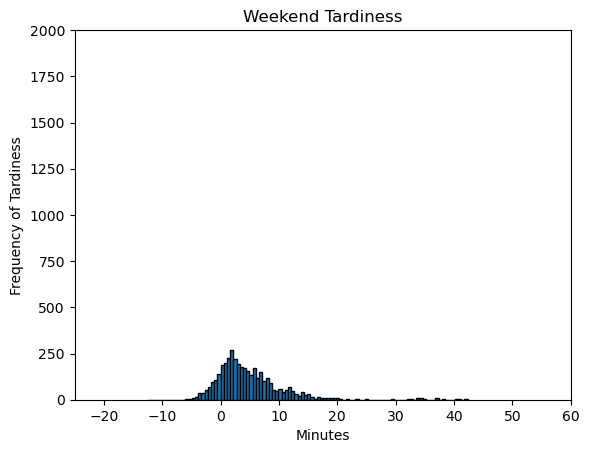

4.91387866751269
1.1464083333333335
7.182654166666667


In [65]:
# Create a histogram plot
plt.hist(difference_times_weekend, bins=100, edgecolor='black')

# Set plot title and labels
plt.title('Weekend Tardiness')
plt.xlabel('Minutes')
plt.ylabel('Frequency of Tardiness')
plt.xlim(-25, 60)  # Set x-axis limits from -25 to 60
plt.ylim(0, 2000)  # Set y-axis limits from 0 to 2000

# Display the plot
plt.show()

print(difference_times_weekend.mean())
print(np.quantile(difference_times_weekend, 0.25))
print(np.quantile(difference_times_weekend, 0.75))

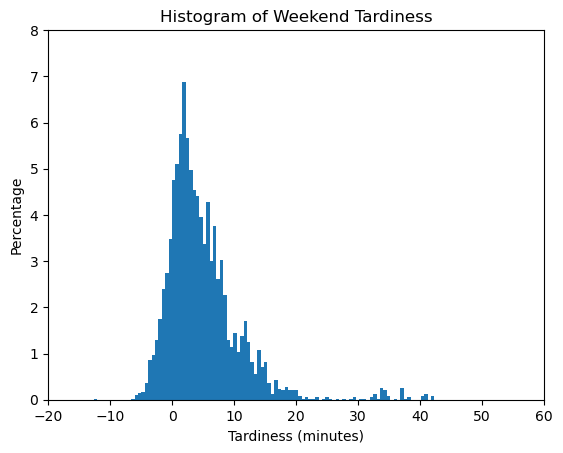

In [109]:
plt.hist(difference_times_weekend, bins=100)

# Calculate the histogram counts and bin edges
counts, bin_edges, _ = plt.hist(difference_times_weekend, bins=100)

# Calculate the percentages
percentages = (counts / len(difference_times_weekend)) * 100

# Plotting with percentages on the y-axis
plt.clf()  # Clear the previous plot
plt.bar(bin_edges[:-1], percentages, align='edge', width=np.diff(bin_edges))

# Add labels and title
plt.xlabel('Tardiness (minutes)')
plt.ylabel('Percentage')
plt.title('Histogram of Weekend Tardiness')
plt.xlim(-20, 60)
plt.ylim(0, 8)

# Display the plot
plt.show()

In [106]:

weekday_sum = 0
weekend_sum = 0
time_of_day = np.empty(0)

missing_data = data.copy()
observed_visit_times = missing_data['observed_visit_time']
scheduled_visit_times = missing_data['scheduled_visit_time']
missing_data_times = missing_data['scheduled_visit_time'].map(format_time)
for number in range(0, missing_data.shape[0] - 1):
    if (observed_visit_times[number] != observed_visit_times[number]):   
        if (missing_data_times[number].weekday() == 6 or missing_data_times[number].weekday() == 5):
            formatted_time = format_time(scheduled_visit_times[number])
            time = formatted_time.time()
            hour = time.hour
            time_of_day = np.append(time_of_day, hour)
            weekend_sum += 1
        else:
            formatted_time = format_time(scheduled_visit_times[number])
            time = formatted_time.time()
            hour = time.hour
            time_of_day = np.append(time_of_day, hour)
            weekday_sum += 1
print(missing)

9588


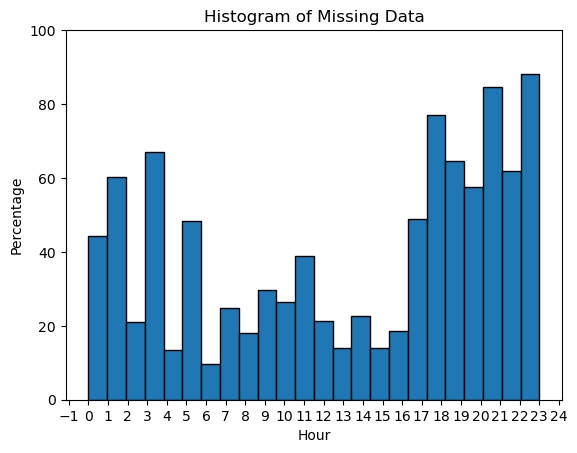

In [107]:
plt.hist(time_of_day, bins=24)

# Calculate the histogram counts and bin edges
counts, bin_edges, _ = plt.hist(time_of_day, bins=24)

# Calculate the percentages
percentages = (counts / hour_count) * 100

# Plotting with percentages on the y-axis
plt.clf()  # Clear the previous plot
plt.bar(bin_edges[:-1], percentages, align='edge', width=np.diff(bin_edges), edgecolor = 'black')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Percentage')
plt.title('Histogram of Missing Data')
plt.ylim(0, 100)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

# Display the plot
plt.show()

In [40]:
def calculate_mean(arr):
    sum = 0
    for element in arr:
        sum += element
    mean = sum/len(arr)
    return mean

In [54]:
arrivals = data.copy() #copy of entire data set

stop_names = arrivals['stop_name'] #just the stop_name column
unique_stop_names = stop_names.unique() #getting all the unique stop names

arrival_times = arrivals['observed_visit_time'] #just the observed_visit_time column

keys = np.empty(0)
for stop in unique_stop_names:
    keys = np.append(keys, stop)

stop_times = {key: [] for key in keys}
#loop through each element in the observed_time column and find the difference in time if observed_time exists for both
for stop in range(0, len(unique_stop_names) - 1):
    for number in range(0, len(arrival_times) - 1):
        if (stop_names[number] == unique_stop_names[stop]):
            if (arrival_times[number] != arrival_times[number]):
                #can have dictionary with key being stop_name and value being array of all the observed_times with a "None" value for missing
                #basically add all these times to the dictionary
                stop_times[unique_stop_names[stop]].append("None")
            else: 
                stop_times[unique_stop_names[stop]].append(arrival_times[number])
        else:
            continue

#print(stop_times[unique_stop_names[1]])
#initialize dictionary of all the difference in times with values being arrays that contain interarrival times

interarrival_times = {key: [] for key in keys}

#then loop through each array in the dictionary to find the difference in times using similar logic to this:
for item in stop_times:
    for number in range(0, len(stop_times[item]) - 2):
        if (stop_times[item][number] == "None" or stop_times[item][number + 1] == "None"):
            continue
        else:
            first = format_time(stop_times[item][number])
            second = format_time(stop_times[item][number + 1])
            difference_in_time = subtract_time(second, first)
            interarrival_times[item].append(difference_in_time)


#dicitonary/map of all the means and other data
interarrival_stats = {key: [] for key in keys}

for item in interarrival_stats.copy():
    if (len(interarrival_times[item]) != 0):
        mean = calculate_mean(interarrival_times[item])
        interarrival_stats[item].append(mean)
    else:
        del interarrival_stats[item]

print(interarrival_stats)




{'GREENMOUNT AVE & EAGER ST nb': [18.246730208333332], 'YORK RD & BEAUMONT AVE nb ns': [16.926867467467453], 'YORK RD & GLENWOOD AVE nb': [16.85054419191919], 'GREENMOUNT AVE & BIDDLE ST nb': [18.244984823399562], 'YORK RD & WOODBOURNE AVE nb': [16.859094612286004], 'GREENMOUNT AVE & PRESTON ST nb': [18.228903035320073], 'YORK RD & BENNINGHAUS RD nb': [16.748264090909096], 'YORK RD & LORTZ LN opp nb': [16.738311414141403], 'GREENMOUNT AVE & FEDERAL ST opp nb': [18.209189514348786], 'YORK RD & BELVEDERE AVE nb': [16.73268535353535], 'GREENMOUNT AVE & NORTH AVE nb': [17.205022804232797], 'YORK RD & NORTHERN PKWY fs nb': [16.90180188008131], 'YORK RD & LAKE AVE nb': [16.8232080792683], 'YORK RD & WALKER AVE nb': [16.76352122122123], 'GREENMOUNT AVE & 22ND ST nb': [17.136639979550083], '6401 YORK RD nb': [16.80596139303484], 'GREENMOUNT AVE & 25TH ST nb': [17.132544222903885], 'YORK RD & DUNKIRK RD nb': [16.79404706467661], 'GREENMOUNT AVE & 27TH ST nb': [17.11724290780142], 'YORK RD & REG

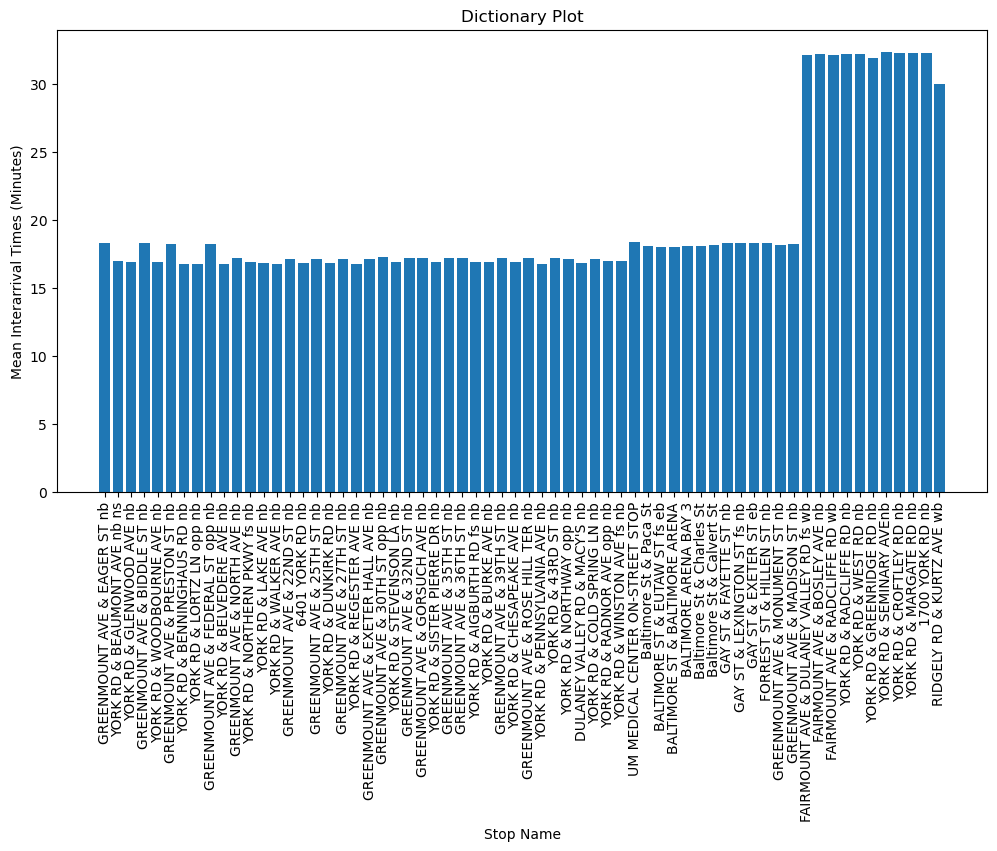

In [57]:
keys = list(interarrival_stats.keys())
values = [value[0] for value in interarrival_stats.values()]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(keys, values)
plt.xticks(rotation=90)
plt.xlabel("Stop Name")
plt.ylabel("Mean Interarrival Times (Minutes)")
plt.title("Dictionary Plot")
plt.show()

